<center> 

# **Análisis de Regresión - Industria Minerometalúrgica (INEGI)** 

</center>

---

## **Descripción:**
Este proyecto consiste en generar modelos de regresión aplicados a una base de datos, llamada Industria Minerometalúrgica Nacional, obtenida del INEGI [(Fuente)](https://www.inegi.org.mx/programas/indminero/), que contiene estadísticas de la industria minerometalúrgica. Las estadísticas incluyen la producción, volumen, valor de la producción, y los índices de volumen físico. La información proviene de los registros de los establecimientos minerometalúrgicos y cubre el periodo comprendido entre los años 2001 y 2024.

En la base de datos se encuentran las siguientes columnas:

- **PROD_EST:** Nombre del proyecto estadístico al que pertenecen los datos. En este caso, aplica la denominación IMMEX por entidad y segmento manufacturero.
- **COBERTURA:** Área geográfica a la que están referidos los indicadores estadísticos.
- **ANIO:** Año al que corresponde la información.
- **MES:** Periodo de referencia de la información.
- **GRUPO_PRODUCTO:** Clasificación de productos según sus características naturales.
- **PRODUCTO:** Nombre del producto minero.
- **UNIDAD_MEDIDA:** Cantidad que determina una magnitud física, en este caso, el volumen físico de la producción expresado en kilogramos o toneladas.
- **VOLUMEN:** Volumen de la producción obtenido de la extracción, beneficio y/o afinación.
- **VALOR:** Valor monetario de la producción minerometalúrgica a precios corrientes.
- **INDICE:** Indicador del volumen de producción expresado en términos relativos a un año base.
- **ESTATUS:** Estatus de las cifras conforme a los lineamientos de cambios en la información divulgada en las publicaciones estadísticas y geográficas del INEGI.


Además, se incluye un diccionario que proporciona más información sobre cada columna.

## **Objetivo:**
El objetivo de este proyecto es generar diferentes modelos de regresión y analizar la relación entre las diversas variables de la base de datos con la variable de salida, que en este caso es el **valor de la producción.** Se busca determinar cómo los precios de los diferentes materiales varían con el tiempo y cómo influyen otros factores. De esta forma, se pretende crear un modelo predictivo capaz de estimar con precisión el valor de la producción en función de dichas variables.

---

In [28]:
#Se importan librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

>## **1. Importación y Visualización de la base de datos**

Para este modelo, solo se tomarán en cuenta las bases de datos desde 2015 hasta 2024, con el objetivo de considerar únicamente los últimos 9 años y evitar que la base de datos se vuelva demasiado pesada para realizar los modelos.

---

>**Función de unificación de archivos**

Se crea función para adjuntar diferentes csv en uno mismo

In [29]:
#Se crea función para juntar archivos csv
def unificar_csv(x1,x2): #x1: Año inicial, x2: Año final
    #Se leen archivos de x1 a x2
    try: 
        #Se lee primer archivo
        union = pd.read_csv(f"eimm_nacional_mensual_tr_cifra_{x1}.csv")

        #Ciclo para leer otro archivos y juntarlos
        for i in range(x1+1,x2):
            new_csv = pd.read_csv(f"eimm_nacional_mensual_tr_cifra_{i}.csv")
            union = pd.concat([union, new_csv], ignore_index=True)

    #Si no se encuentran archivos salir
    except FileNotFoundError:
        return
    
    return union

#Para crear el csv unificado
#file = unificar_csv(2015,2024)
#file.to_csv("Industria_Minerometalurgica_2015_2024")

>**Lectura y muestra de csv**

Se muestra la información del archivo csv principal (Archivo unificado).

In [30]:
#Se lee archivo csv desde 2015 a 2024
file = pd.read_csv("Industria_Minerometalurgica_2015_2024")

#Se elimina primera columna que no debería aparecer
file = file.drop(file.columns[0],axis=1)

#Se imprimen dimemsiones del Data Frame
print(f"Dimensiones: {file.shape}")
print(f"Observaciones: {file.shape[0]}")
print(f"Variables: {file.shape[1]}")

#Se muestra primeros 5 datos
file.head(5)

Dimensiones: (3456, 11)
Observaciones: 3456
Variables: 11


,PROD_EST,COBERTURA,ANIO,MES,GRUPO_PRODUCTO,PRODUCTO,UNIDAD_MEDIDA,VOLUMEN,VALOR,INDICE,ESTATUS
0,Producción minerometalúrgica por principales p...,Nacional,2015,1,Metales Preciosos,Oro,Kilogramos,9275.4,5475746.352,221.0,Cifras Definitivas.
1,Producción minerometalúrgica por principales p...,Nacional,2015,1,Metales Preciosos,Plata,Kilogramos,388381.3,3159531.487,174.7,Cifras Definitivas.
2,Producción minerometalúrgica por principales p...,Nacional,2015,1,Metales Industriales No Ferrosos,Plomo,Toneladas,16471.0,442294.431,196.2,Cifras Definitivas.
3,Producción minerometalúrgica por principales p...,Nacional,2015,1,Metales Industriales No Ferrosos,Cobre,Toneladas,41287.0,3525092.062,184.4,Cifras Definitivas.
4,Producción minerometalúrgica por principales p...,Nacional,2015,1,Metales Industriales No Ferrosos,Zinc,Toneladas,30987.0,960173.502,93.6,Cifras Definitivas.


> **Tipo de datos**

Se muestra el tipo de dato de cada variable

In [31]:
#Se muestra tipo de datos de cada variable
print("Tipo de variable")
print(file.dtypes)

Tipo de variable
PROD_EST           object
COBERTURA          object
ANIO                int64
MES                 int64
GRUPO_PRODUCTO     object
PRODUCTO           object
UNIDAD_MEDIDA      object
VOLUMEN           float64
VALOR             float64
INDICE            float64
ESTATUS            object
dtype: object


>**Gráficas de datos**

Se gráfican todas las variables con respecto la salida (valor), unicamente con el fin de ver su relación. 

Nota: Se eliminaron ejes por poca visualización debido a la cantidad de variables cualitativas.

Visualización individual de variables.


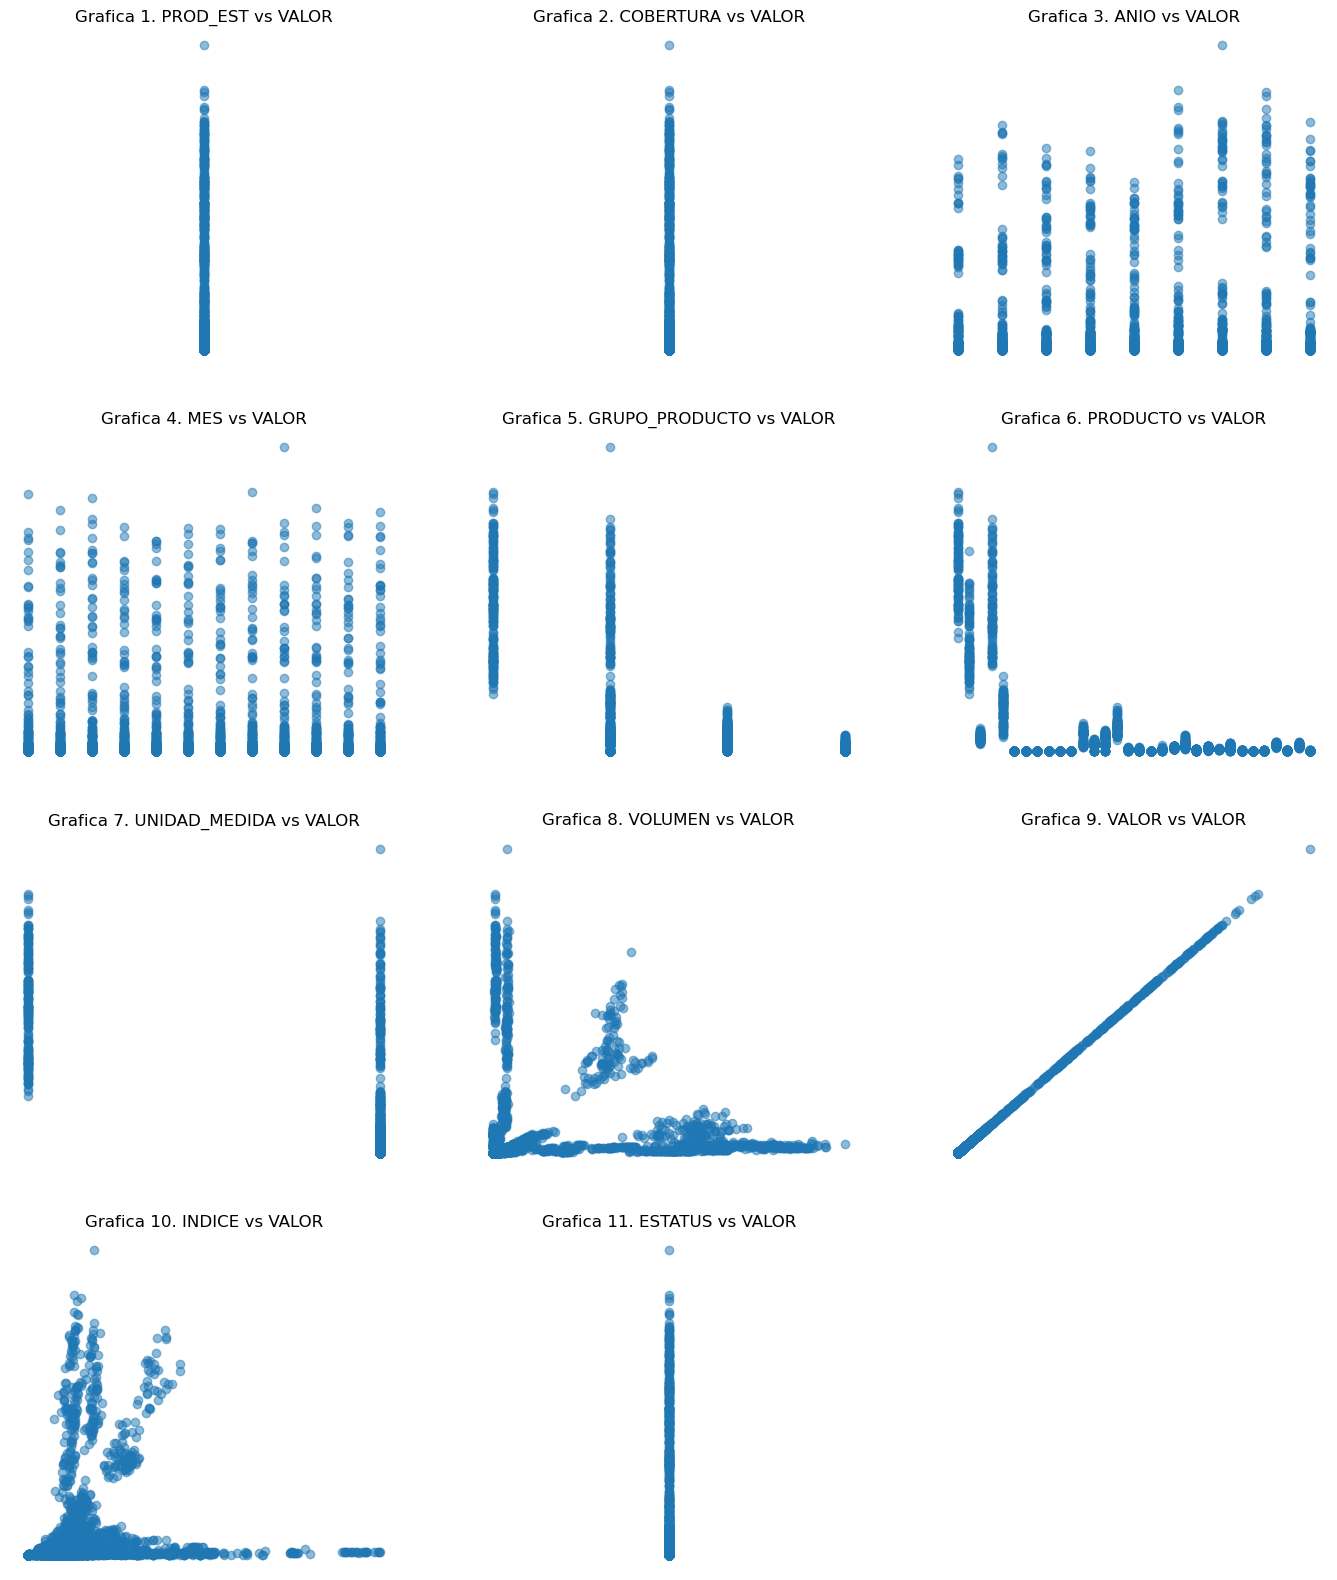

In [32]:
#Gráficas individuales para ver mejor el comportamiento con el valor
print("Visualización individual de variables.")
plt.figure(figsize=(17,20))

#Ciclo para generar cada gráfica
for i in range( len(file.columns)):
    plt.subplot(4,3,i+1)
    plt.scatter(file[file.columns[i]],(file.VALOR), alpha=0.5)
    plt.title(f"Grafica {i+1}. {file.columns[i]} vs VALOR")
    plt.gca().set_axis_off()
plt.show()

**Comentario:**

En las gráficas anteriores, se puede ver que las variables PROD_EST, COBERTURA y ESTATUS, realmente no tienen una interacción significante con el VALOR, sin embargo, se eliminaran en métodos posteriores.

>## **2. Solución de Problemas**

Para la solución de problemas se generarán variables dummies, se buscarán datos vacios, se crearan interacciones y se evaluará la colinealidad entre las variables.

---

>**Unidades de Medida (Interacción)**

Se convierten todas las observaciones de UNIDAD_MEDIDA a toneladas y se modifica el valor de su volumen para garantizar que todas las observaciones utilicen la misma unidad. Esta conversión es crucial para asegurar la consistencia en el análisis y evitar errores en la interpretación de los datos. 

In [33]:
#Se encuentran las observaciones en kilogramos
ind_kg = np.where(file.UNIDAD_MEDIDA == "Kilogramos")[0]

#Se encuentran observaciones de toneladas
ind_ton = np.where(file.UNIDAD_MEDIDA == "Toneladas")[0]

#Se modifica kilagrmos por 1000 y toneladas por 1
file.loc[ind_kg,"UNIDAD_MEDIDA"] = (1000)
file.loc[ind_ton,"UNIDAD_MEDIDA"] = (1)

#Se modifican observaciones de VOLUMEN que tengan kilogramos, dividiendolas entre 1000
file.VOLUMEN = (file.VOLUMEN/file.UNIDAD_MEDIDA.astype(float))

#Se elimina UNIDAD_MEDIDA
#file = file.drop("UNIDAD_MEDIDA",axis=1)

#Se muestra cambio
file.head(5)

,PROD_EST,COBERTURA,ANIO,MES,GRUPO_PRODUCTO,PRODUCTO,UNIDAD_MEDIDA,VOLUMEN,VALOR,INDICE,ESTATUS
0,Producción minerometalúrgica por principales p...,Nacional,2015,1,Metales Preciosos,Oro,1000,9.2754,5475746.352,221.0,Cifras Definitivas.
1,Producción minerometalúrgica por principales p...,Nacional,2015,1,Metales Preciosos,Plata,1000,388.3813,3159531.487,174.7,Cifras Definitivas.
2,Producción minerometalúrgica por principales p...,Nacional,2015,1,Metales Industriales No Ferrosos,Plomo,1,16471.0000,442294.431,196.2,Cifras Definitivas.
3,Producción minerometalúrgica por principales p...,Nacional,2015,1,Metales Industriales No Ferrosos,Cobre,1,41287.0000,3525092.062,184.4,Cifras Definitivas.
4,Producción minerometalúrgica por principales p...,Nacional,2015,1,Metales Industriales No Ferrosos,Zinc,1,30987.0000,960173.502,93.6,Cifras Definitivas.


>**Verificación de datos vacios**

Se buscan datos vacíos para eliminar, ya que la presencia de valores faltantes puede afectar la calidad y la precisión del modelo. En este caso, dado que se dispone de una base de datos amplia, no se procederá a predecir o estimar los valores faltantes. En lugar de imputar estos valores, se optará por eliminarlos, lo que simplifica el proceso y asegura que el análisis se realice solo con datos completos y fiables.

In [34]:
#Se buscan datos vacios
ind_vacio = np.where(file.VALOR==0)[0]

#Cantidad de datos
print(f"Cantidad de observaciones vacias: {len(ind_vacio)}")

#Se eliminan datos, ya que no se desea escribir algun valor erronea porque se desconoce la medición
file = file.drop(ind_vacio)

print(f"Nuevas dimensiones: {file.shape}")

Cantidad de observaciones vacias: 395
Nuevas dimensiones: (3061, 11)


>**Variables dummies**

Las variables cualitativas se tranforman en variables dummies.
Por ejemplo: PROD_EST, COBERTURA, GRUPO_PRODUCTO, PRODUCTO, UNIDAD_MEDIDA.

In [35]:
#Se define posición de las variables dummies
ind_object = np.where(file.dtypes=="object")[0]

#Se crea ciclo para variables dummies
for i in ind_object:
    dummy = pd.get_dummies(file.iloc[:,i],drop_first=True).astype(int)
    file = pd.concat([file, dummy],axis=1)

#Se eliminan columnas de variables cualitativas originales
file = file.drop(file.columns[ind_object],axis=1)

#Se cambia nombre de 1000 que es la unidad de kg a tn
columns_names = file.columns[:-1]
columns_names = np.append(columns_names,['Convertida_tn'])
file.columns = columns_names

#Se muestra 5 filas de la nueva tabla
file.head(5)

,ANIO,MES,VOLUMEN,VALOR,INDICE,Metales Preciosos,Metales y Minerales Siderúrgicos,Minerales No Metálicos,Azufre,Barita,...,Plata,Plomo,Sal,Selenio,Sulfato de Magnesio,Sulfato de Sodio,Wollastonita,Yeso,Zinc,Convertida_tn
0,2015,1,9.2754,5475746.352,221.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2015,1,388.3813,3159531.487,174.7,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,2015,1,16471.0000,442294.431,196.2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2015,1,41287.0000,3525092.062,184.4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,1,30987.0000,960173.502,93.6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


>**Colinearidad**

Se crea mapa de colinearidad donde solo se pueden ver los datos con una colinearidad mayor a (0.6).

La variables con mayor correlación son: Metales Preciosos y Convertida_tn
Con una correlación de: 1.0


<Axes: >

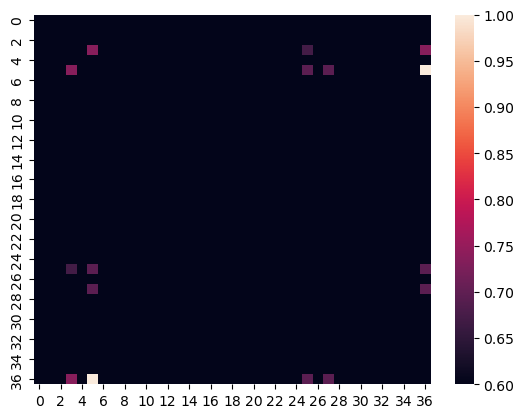

In [36]:
#Se importa librería para heatmap
from seaborn import heatmap

#Se crea matriz de correlación
cor=abs(np.corrcoef(file,rowvar=False))

#Se modifican las digonales
np.fill_diagonal(cor,0)

#Se verfica valores con mayor correlación
i,j=np.unravel_index(cor.argmax(),cor.shape)

#Se imprime las variables con mayor relación
print(f"La variables con mayor correlación son: {file.columns[i]} y {file.columns[j]}")
print(f"Con una correlación de: {cor[i,j]}")

#Sea crea e imprime heatmap, solo se pueden visualizar valores mayores a 0.6
heatmap(cor, vmin=0.6, vmax=1)

In [37]:
#Lectura y verificación de colinearidad para variables mayores a 0.7
for i in range(len(file.columns)):
    for j in range(i,len(file.columns)):
        if cor[i,j] > 0.7:
            print(f"Las variables son: {file.columns[i]} y {file.columns[j]}")
            print(f"Con una correlación de: {cor[i,j]}\n")

Las variables son: VALOR y Metales Preciosos
Con una correlación de: 0.7368653776406259

Las variables son: VALOR y Convertida_tn
Con una correlación de: 0.7368653776406259

Las variables son: Metales Preciosos y Convertida_tn
Con una correlación de: 1.0



**Comentario:**

En este caso, solo se eliminará la variable Convertida_tn, ya que las demás variables no presentan una colinealidad significativa. 

>**Eliminación de variables**

Se eliminan variables con alta colinealidad.

In [38]:
#Se elimina variable de unidad de medida 
file = file.drop("Convertida_tn",axis=1)

#Se muestran solamente las columnas
print(file.columns)

Index(['ANIO', 'MES', 'VOLUMEN', 'VALOR', 'INDICE', 'Metales Preciosos',
       'Metales y Minerales Siderúrgicos', 'Minerales No Metálicos', 'Azufre',
       'Barita', 'Bismuto', 'Cadmio', 'Caolin', 'Carbon No Coquizable',
       'Celestita', 'Cobre', 'Coque', 'Diatomita', 'Dolomita', 'Feldespato',
       'Fluorita', 'Fosforita', 'Grafito', 'Manganeso', 'Molibdeno', 'Oro',
       'Pellets de fierro', 'Plata', 'Plomo', 'Sal', 'Selenio',
       'Sulfato de Magnesio', 'Sulfato de Sodio', 'Wollastonita', 'Yeso',
       'Zinc'],
      dtype='object')


>## **3. Selección de Características**

Para la selección de características se seguirá la siguiente metodología: primero, se generarán los datos de entrenamiento y de prueba. Una vez completado esto, se realizará un modelo Ridge con el fin de evaluar su rendimiento y compararlo con una selección de características hacia adelante y validación cruzada. Posteriormente, se llevará a cabo un método manual para analizar la significancia de las variables que no corresponden a algún mineral o metal.

---

In [39]:
#Se importa método para separar variables en entrenamiento y prueba
from sklearn.model_selection import train_test_split

#Se importa metodo de r2 para comparar selección de variables
from sklearn.metrics import r2_score

#Se importa librería para regresión 
import statsmodels.api as sm 

>**Datos entrenamiento y prueba**

Se dividen en datos de entrenamiento y de prueba, y se verifica que las dimensiones estén correctas.


In [40]:
#Se generan variables de entrenamiento y prueba con separación de 0.6
Xtrain, Xtest, Ytrain, Ytest = train_test_split(file.drop("VALOR",axis=1),file.VALOR,train_size=0.6)

#Se defiene columnas de X
columnas = list(Xtrain.columns)

#Dimensiones de train y test
print("Datos:")
print(f"Dimensiones de train: {Xtrain.shape}")
print(f"Dimensiones de test: {Xtest.shape}")
print(f"Dimensiones de archivo actual: {file.shape}")
print(f"Comprobación: {file.shape[0]==(list(Xtrain.shape)[0] + list(Xtest.shape)[0])}")

Datos:
Dimensiones de train: (1836, 35)
Dimensiones de test: (1225, 35)
Dimensiones de archivo actual: (3061, 36)
Comprobación: True


>**Regularización Ridge**

Se crea un modelo de regularización Ridge con el fin de comparar la efectividad de la selección de variables mediante la técnica de selección hacia adelante y validación cruzada. Esto se debe a que la regularización Ridge no elimina variables, sino que reduce su significancia en el modelo, a diferencia de otras técnicas como Forward, Backward, Cross Selection o Lasso.

0.9351225460633515


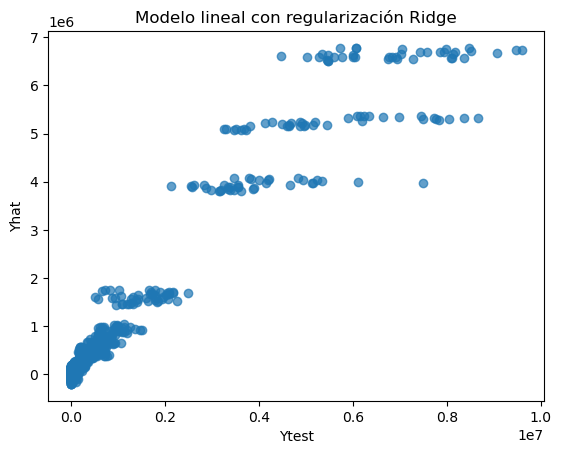

In [41]:
#Se importa librería de regularización Ridge
from sklearn.linear_model import Ridge

#Se crea modelo de regresión con Ridge
reg_ridge = Ridge().fit(Xtrain,Ytrain)

#Se crea predicción de este modelo
yhat_r2 = reg_ridge.predict(Xtest)

#Se imprime resultado de R2, para después compararlo 
print(r2_score(Ytest,yhat_r2))

#Se crea data frame con estos datos
df_ridge = pd.DataFrame({"Ytest":Ytest,"Yhat":yhat_r2})

#Se gráfica la visualización de resultados
plt.scatter(df_ridge["Ytest"],df_ridge["Yhat"],alpha=0.7)
plt.title("Modelo lineal con regularización Ridge")
plt.xlabel("Ytest")
plt.ylabel("Yhat")
plt.show()

> **Selección de Características**

Se realiza una selección de características utilizando el método de selección hacia adelante, con validación cruzada. Este enfoque implica comenzar con un modelo vacío y añadir iterativamente las características que mejoran el rendimiento del modelo, evaluando en cada paso la contribución de cada característica adicional mediante validación cruzada. Este proceso ayuda a identificar las características que mejoran la capacidad predictiva del modelo y evita el sobreajuste al utilizar diferentes conjuntos de datos para la validación.

In [42]:
#Se importan librerías para realizar selección cruzada
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression 

#Se crea el estimador
estimador = LinearRegression()

#Se verifican variables
sfs = SFS(estimador, k_features=(2,35), forward=True, scoring='r2', cv=5, n_jobs=-1)
sfs.fit(Xtrain,Ytrain)

#Se guardan variables
selected_features = list(sfs.k_feature_names_)

#Variables eliminadas
not_selected = [col for col in columnas if col not in selected_features]

#Se muestran datos del modelo
print("Selección de características:")
print("Cantidad de características seleccionadas:",len(selected_features))
print("Características seleccionadas:",selected_features,"\n")
print("Cantidad de características eliminadas:", len(not_selected))
print("Características eliminadas:", not_selected,"\n")

#Se muestra r2 del modelo
forward_model = estimador.fit(Xtrain[selected_features],Ytrain)
yhat_forward = forward_model.predict(Xtest[selected_features])
print(f"R2: {r2_score(Ytest, yhat_forward)}")


Selección de características:
Cantidad de características seleccionadas: 26
Características seleccionadas: ['ANIO', 'VOLUMEN', 'INDICE', 'Metales Preciosos', 'Metales y Minerales Siderúrgicos', 'Azufre', 'Bismuto', 'Caolin', 'Carbon No Coquizable', 'Cobre', 'Coque', 'Diatomita', 'Dolomita', 'Feldespato', 'Fluorita', 'Fosforita', 'Grafito', 'Manganeso', 'Molibdeno', 'Oro', 'Pellets de fierro', 'Plomo', 'Sal', 'Sulfato de Sodio', 'Yeso', 'Zinc'] 

Cantidad de características eliminadas: 9
Características eliminadas: ['MES', 'Minerales No Metálicos', 'Barita', 'Cadmio', 'Celestita', 'Plata', 'Selenio', 'Sulfato de Magnesio', 'Wollastonita'] 

R2: 0.9357184726878138


>**Selección de caracaterísticas  manual**

Se realiza una función de selección de características manual con el fin de eliminar únicamente las variables que no se desean utilizar en el método. La finalidad de esta selección es encontrar otras variables que puede que no tengan significancia.

In [43]:
# Variables que se desearían mantener
variables_fijas = ['Azufre','Barita', 'Bismuto', 'Cadmio', 'Caolin', 'Carbon No Coquizable', 'Celestita',
                'Cobre', 'Coque', 'Diatomita', 'Dolomita', 'Feldespato', 'Fluorita', 'Fosforita', 
                'Grafito', 'Manganeso', 'Molibdeno', 'Oro', 'Pellets de fierro', 'Plata', 'Plomo',
                'Sal', 'Selenio','Sulfato de Magnesio', 'Sulfato de Sodio', 'Wollastonita', 'Yeso', 'Zinc']

# Definición de la función para selección hacia adelante
def forward_selection(xtrain, ytrain, var_fija=[]):
    #Variables restantes
    var = [col for col in xtrain.columns if col not in var_fija]

    #Se crean variables del modelo
    var_model, r2_inv, r2, c = [], [], 0, 0

    #Evaluación de cada variable individualmente
    for i in var:
        var_total = var_fija + [i]  # Combinación de variables fijas con la variable actual
        modelo_individual = sm.OLS(ytrain, sm.add_constant(xtrain[var_total])).fit()
        r2_inv.append(modelo_individual.rsquared)

    #Creación del DataFrame con los resultados de R2
    df_var = pd.DataFrame({"Var": var, "R2": r2_inv})
    df_var = df_var.sort_values(by="R2", ascending=False)
    
    #Ciclo para seleccionar variables
    for i in df_var['Var']:
        var_fija.append(i)
        modelo_r2 = sm.OLS(ytrain, sm.add_constant(xtrain[var_fija])).fit()

        if c < (modelo_r2.rsquared):
            c = (modelo_r2.rsquared)
            RSE = np.sqrt(modelo_r2.scale)
            r2 = modelo_r2.rsquared
            var_model = var_fija.copy()

    #Se guardan variables eliminadas
    var_eliminadas = [col for col in xtrain.columns if col not in var_model]

    #Resultados
    return var_model, var_eliminadas, r2

# Ejecución del proceso de selección hacia adelante
var_seleccion, var_eliminadas, val_r2 = forward_selection(Xtrain, Ytrain, variables_fijas)

#Se muestran resultados
print("Datos:")
print("Cantidad de variables seleccionadas:", len(var_seleccion))
print("Variables seleccionadas:", var_seleccion,"\n")
print("Cantidad de variables eliminadas:", len(var_eliminadas))
print("Variables eliminadas:", var_eliminadas,"\n")

manual_model = LinearRegression().fit(Xtrain[var_seleccion],Ytrain)
manual_yhat = manual_model.predict(Xtest[var_seleccion])
print(f"R2: {r2_score(Ytest,manual_yhat)}")

Datos:
Cantidad de variables seleccionadas: 32
Variables seleccionadas: ['Azufre', 'Barita', 'Bismuto', 'Cadmio', 'Caolin', 'Carbon No Coquizable', 'Celestita', 'Cobre', 'Coque', 'Diatomita', 'Dolomita', 'Feldespato', 'Fluorita', 'Fosforita', 'Grafito', 'Manganeso', 'Molibdeno', 'Oro', 'Pellets de fierro', 'Plata', 'Plomo', 'Sal', 'Selenio', 'Sulfato de Magnesio', 'Sulfato de Sodio', 'Wollastonita', 'Yeso', 'Zinc', 'ANIO', 'VOLUMEN', 'INDICE', 'MES'] 

Cantidad de variables eliminadas: 3
Variables eliminadas: ['Metales Preciosos', 'Metales y Minerales Siderúrgicos', 'Minerales No Metálicos'] 

R2: 0.9357020118542833


> **Eliminación de variables**

Se eliminaron variables de las selecciones anteriores. En este caso, se seleccionaron algunas variables de manera manual debido a que el método de selección hacia adelante tiende a modificar su comportamiento con cada ejecución, así como el comportamiento del modelo. Esto se debe a que el método iterativo puede ser sensible a la variabilidad en los datos y a la inclusión de diferentes combinaciones de variables. Para abordar esto, se eliminaron las variables que más afectaban negativamente al modelo y que se repetían en las selecciones sucesivas. Por otra parte, los varaibles de los materiales si se eliminan empeoran el modelo, ya que el valor esta asociado directamente a cada material.

In [44]:
#Se crea variable con variables a eliminar
variables_modelo = list(set(['MES','INDICE'] + var_eliminadas)) #not_selected

#Se cambian datos
Xtrain = Xtrain.drop(variables_modelo,axis=1)
Xtest = Xtest.drop(variables_modelo,axis=1)

#Se imprimen variables
print(f"Variables eliminadas: \n{variables_modelo}")

Variables eliminadas: 
['INDICE', 'Metales y Minerales Siderúrgicos', 'MES', 'Minerales No Metálicos', 'Metales Preciosos']


>## **4. Generación de Modelos**

Se generarán dos modelos con el fin de comprobar la eficacia de cada uno. En caso de que ninguno sea adecuado, se generarán más modelos con el objetivo de obtener el mejor. Los modelos a evaluar son la regresión lineal múltiple y la regresión no lineal KNN.

---

> **Modelo de regresión lineal multiple**

Se crea modelo de regresión lineal con variables definidas previamente.

In [45]:
#Se crea modelo lineal
lineal_model = sm.OLS(Ytrain,sm.add_constant(Xtrain)).fit()

#Se realizan predicciones
yhat_lm = lineal_model.predict(sm.add_constant(Xtest))

print(r2_score(Ytest,yhat_lm))

#Se muestran resultados
print(lineal_model.summary())

0.9356972636745512
                            OLS Regression Results                            
Dep. Variable:                  VALOR   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     916.2
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        09:06:48   Log-Likelihood:                -26428.
No. Observations:                1836   AIC:                         5.292e+04
Df Residuals:                    1805   BIC:                         5.309e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const        

>**Estadísticos del modelo lineal**

In [46]:
#Se guardan valores de R2 y RSE
R2_ml = r2_score(Ytest,yhat_lm)
RSE_ml = np.sqrt(lineal_model.scale)

#Se muestran pvalues y r2
print("Datos del modelo de regresión lineal multiple")
print(f"R2: {R2_ml}")
print(f"RSE: {RSE_ml}\n")

print("P-values mayores a 0.05")
for i in range(1,len(list(lineal_model.pvalues))):
    if lineal_model.pvalues.iloc[i] > 0.05:
        print(f"{Xtrain.columns[i-1]:21}: {lineal_model.pvalues.iloc[i]:4f}")

Datos del modelo de regresión lineal multiple
R2: 0.9356972636745512
RSE: 435368.93019230006

P-values mayores a 0.05
Azufre               : 0.434069
Barita               : 0.227996
Bismuto              : 0.157864
Cadmio               : 0.544773
Caolin               : 0.259274
Carbon No Coquizable : 0.670500
Celestita            : 0.509914
Diatomita            : 0.323024
Feldespato           : 0.660352
Fosforita            : 0.182315
Grafito              : 0.485106
Manganeso            : 0.165757
Selenio              : 0.535368
Sulfato de Magnesio  : 0.399459
Wollastonita         : 0.398891


**Comentario del Modelo Lineal:**

Se muestran valores estadísticos y de error del modelo, como p-values, RSE y R2. Para gran parte de los coeficientes, se puede decir que existe un 95% de confianza en que son significativos; sin embargo, hay coeficientes como los de Azufre, Barita, Bismuto, Cadmio, Caolín, Carbón No Coquizable, Celestita, Diatomita, Feldespato, Fosforita, Grafito, Manganeso, Selenio, Sulfato de Magnesio y Wollastonita que no lo son. La mayoría de estas variables tiene algo en común: son minerales no metálicos o no ferrosos, lo que sugiere que el modelo tiene una mayor significancia con los materiales metálicos. Personalmente, considero que esto se debe a que estos minerales tienen una menor cantidad de observaciones en comparación con los metálicos.

>**Modelo de regresión no lineal KNN y valores Estadísticos**

Se realiza un modelo KNN (de vecinos más cercanos), y en este caso se seleccionaron los 5 vecinos más cercanos.

In [47]:
#Se importa librería
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.preprocessing import PolynomialFeatures

#Se crea modelo
modelo_knn = KNN(n_neighbors=5).fit(Xtrain,Ytrain)

#Se realizan predicciones
yhat_knn = modelo_knn.predict(Xtest)

#Se calcula valores de error del modelo
R2_knn = r2_score(Ytest,yhat_knn)
RSS_knn = sum((list(Ytest) - yhat_knn)**2)
RSE_knn = np.sqrt(RSS_knn/(len(Ytest)))

#Se imprimen resulados
print("Datos:")
print(f"R2: {R2_knn}")
print(f"RSS: {RSS_knn}")
print(f"RSE: {RSE_knn}")


Datos:
R2: 0.7630777194604526
RSS: 799940808694146.2
RSE: 808092.1389646393


**Comentario del Modelo KNN:**

Este modelo KNN, a diferencia del de regresión lineal múltiple, presenta un R2 significativamente menor, casi a un tercio del valor obtenido con la regresión lineal, y un Error Estándar de la Regresión (RSE) mayor. Esto sugiere que el modelo KNN no es tan efectivo en la predicción de la variable dependiente en comparación con el modelo de regresión lineal múltiple. Además, el modelo KNN carece de la interpretabilidad que ofrece el modelo de regresión lineal múltiple, lo que dificulta la comprensión de las relaciones entre las variables independientes y dependientes. Por lo tanto, a pesar de su capacidad para capturar patrones complejos, el modelo KNN no parece ser la mejor opción en este caso, especialmente cuando se considera la importancia de la interpretabilidad en el análisis.

>**Visualización de Modelos**

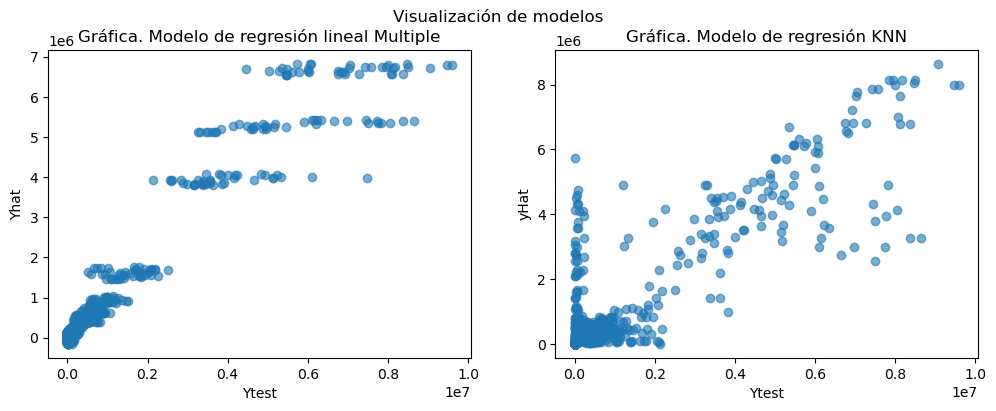

In [48]:
plt.figure(figsize=(12,4))
plt.suptitle("Visualización de modelos")

#Se crea gráfico de Modelo Lineal
plt.subplot(1,2,1)
plt.scatter(Ytest,yhat_lm,alpha=0.6)
plt.title("Gráfica. Modelo de regresión lineal Multiple")
plt.xlabel("Ytest")
plt.ylabel("Yhat")

#Gráfica de modelo KNN
plt.subplot(1,2,2)
plt.scatter(Ytest,yhat_knn,alpha=0.6)
plt.title("Gráfica. Modelo de regresión KNN")
plt.ylabel("yHat")
plt.xlabel("Ytest")
plt.show()

>**Comentario:**

se puede apreciar que en el modelo lineal la distribución de los datos es mejor en comparación con el modelo KNN. En la gráfica del modelo lineal, los puntos están más cercanos a la línea de identidad (diagonal), lo que indica que las predicciones del modelo lineal se ajustan de manera más precisa a los valores reales. Esto sugiere que el modelo lineal captura de manera más efectiva la relación entre las variables dependientes e independientes, produciendo una menor discrepancia entre los valores predichos y los valores reales.

>## **5. Métricas**

En esta sección se hablará de las métricas de los modelos, y que mencionan.

---

In [49]:
#Se crea data frame con valores de RSE y R2
Tabla_metricas = pd.DataFrame({"Modelo":["Lineal Multiple","KNN"],"RSE":[RSE_ml,RSE_knn],"R2":[R2_ml,R2_knn]})
Tabla_metricas.head(2)

,Modelo,RSE,R2
0,Lineal Multiple,435368.930192,0.935697
1,KNN,808092.138965,0.763078


**Comentario:**

Para evaluar el desempeño del modelo, se calcularon dos métricas clave: una métrica de error y una métrica del nivel de linealidad. La métrica de error utilizada es el Error Estándar de la Regresión (RSE), que mide la diferencia promedio entre los valores observados y los valores predichos por el modelo. Un menor RSE indica un ajuste más preciso del modelo a los datos. La métrica del nivel de linealidad es el R2, que indica la proporción de la variabilidad de la variable dependiente que es explicada por el modelo. Un R2 cercano a 1 sugiere que el modelo se ajusta bien a los datos y captura la relación lineal entre las variables. En términos sencillos, el RSE nos dice cuánto se desvían las predicciones del modelo respecto a los datos reales; mientras que el R2 nos muestra qué tan bien el modelo explica las variaciones observadas en los datos. Un modelo con bajo RSE y alto R2 generalmente tiene un buen desempeño y es capaz de hacer predicciones precisas en nuevos datos.


De esta forma, el modelo con mejor resultado fue el de regresión lineal múltiple. Este modelo demostró una capacidad superior para explicar la variabilidad en la variable dependiente en comparación con otros métodos evaluados. La regresión lineal múltiple presentó un alto valor de R2, indicando que una gran proporción de la variabilidad en los datos se puede atribuir a las variables independientes incluidas en el modelo; y teniendo un RSE menor, significando una menor variación entre los datos.

>## **6. Análisis de Inferencia**

Se genera un modelo basado en el mejor obtenido anteriormente con el fin de realizar un análisis de inferencia.

---

>**Modelo de inferencia**

Se crea modelo de inferencia en base datos obtenidos en el de regresión lineal multiple.

In [50]:
#Se vuelve a entrenar modelo
vinf = list(set(variables_modelo + ["VALOR"]))
Xinf = file.drop(vinf,axis=1)
Xinf_test = file.drop(vinf,axis=1)
Yinf = file.VALOR
Yinf_test = file.VALOR

#Se crea nuevo modelo de inferencia
inf_model = sm.OLS(Yinf, sm.add_constant(Xinf)).fit()

print(inf_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALOR   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     1517.
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        09:06:49   Log-Likelihood:                -44026.
No. Observations:                3061   AIC:                         8.811e+04
Df Residuals:                    3030   BIC:                         8.830e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -7.262e+07 

**Comentario:**

El valor p asociado con el estadístico F es menor a 0.05, lo que indica que el modelo de regresión lineal múltiple es estadísticamente significativo en su conjunto. Este valor p bajo sugiere que al menos una de las variables independientes tiene una relación significativa con la variable dependiente y que el modelo, en general, explica una parte importante de la variabilidad en los datos.

>**Análisis de coeficientes del modelo**

Se realizará una interpretación y análisis detallado de los coeficientes.

In [51]:
#Se crea data frame de los coeficientes
df_valores = pd.DataFrame({
    "Coeficientes": inf_model.params,
    "P-value": inf_model.pvalues,
    "Intervalo Inferior": inf_model.conf_int()[0],
    "Intervalo Superior": inf_model.conf_int()[1]
})

#Se muestran valores
df_valores.head(len(df_valores.Coeficientes))

,Coeficientes,P-value,Intervalo Inferior,Intervalo Superior
const,-7.262315e+07,1.809205e-31,-8.468689e+07,-6.055941e+07
ANIO,3.593884e+04,1.890147e-31,2.996694e+04,4.191074e+04
VOLUMEN,7.870032e-01,2.035767e-08,5.126225e-01,1.061384e+00
Azufre,8.469575e+04,1.867743e-01,-4.106674e+04,2.104582e+05
Barita,1.114595e+05,8.502170e-02,-1.539235e+04,2.383114e+05
Bismuto,1.456467e+05,6.033350e-02,-6.332372e+03,2.976257e+05
Cadmio,6.650863e+04,3.171177e-01,-6.382452e+04,1.968418e+05
Caolin,9.953680e+04,1.275766e-01,-2.851295e+04,2.275866e+05
Carbon No Coquizable,-3.607653e+04,5.865867e-01,-1.661443e+05,9.399120e+04
Celestita,6.323097e+04,3.391667e-01,-6.646004e+04,1.929220e+05


**Comentario:**

Los coeficientes presentados muestran la influencia de diferentes variables (minerales y materiales) sobre la variable dependiente. Al observar los resultados, se destacan varias variables que tienen un impacto considerable y estadísticamente significativo en el modelo. Entre las más relevantes se encuentran el Cobre, Oro, Plata, Zinc y Coque, las cuales tienen valores p cercanos a 0 (p < 0.001), lo que indica una alta significancia estadística. Esto sugiere que estas variables tienen un fuerte impacto en la variable dependiente. Por ejemplo, el coeficiente de Cobre (5.49e+06) indica que esta variable tiene una gran influencia en el comportamiento del modelo.

Por otro lado, hay un grupo de variables con significancia moderada, como Dolomita, Fluorita, Sulfato de Sodio, Yeso y Sal, que tienen valores p entre 0.001 y 0.05. Aunque estas variables son relevantes para el modelo, su influencia es menos pronunciada en comparación con las variables altamente significativas. Sin embargo, sus intervalos de confianza, aunque más amplios, aún permiten una interpretación válida sobre su impacto en el modelo.

Una gran parte de las variables, como Azufre, Barita, Bismuto, Selenio, Caolín, entre otras, no resultan ser estadísticamente significativas, ya que presentan valores p altos. Esto indica que no se puede afirmar con un alto grado de confianza que estas variables tengan un impacto relevante en la variable dependiente. Además, los amplios intervalos de confianza sugieren una mayor incertidumbre sobre su verdadera influencia en el modelo.

Finalmente, algunas variables como Carbon No Coquizable, Dolomita, Sal y Yeso muestran coeficientes negativos, lo que sugiere que tienen un efecto adverso sobre la variable dependiente. Por ejemplo, un aumento en la producción de Yeso se asocia con una disminución en la variable dependiente.

En general, el modelo de regresión indica que las variables metálicas, como Cobre, Oro, Plata y Zinc, tienen un impacto significativo y son las más relevantes para la predicción de la variable dependiente. En cambio, muchas de las variables asociadas a minerales no metálicos o no ferrosos no son significativas o tienen una influencia menos clara, lo que podría estar relacionado con la cantidad de observaciones o con factores externos que el modelo no está capturando adecuadamente.

>**Estadísticos del modelo**

Se calcularán métricas de error del modelo para generar una conclusión detallada. Estas métricas incluirán, entre otras, R2, el margen de error y el RSE. 

In [52]:
# Predecir valores en el conjunto de prueba
Yhat = inf_model.predict(sm.add_constant(Xinf_test))

#Se calculan errores en las predicciones
RSE_inf = np.sqrt(inf_model.scale)                  #RSE
R2_inf = r2_score(Yinf_test,Yhat)                   #R2
margenes_error = Yinf_test - Yhat                   #Margen de error
margen_medio = np.mean(np.abs(margenes_error))      #Margen medio

#Se muestran resultados
print("Datos:")
print(f'RSE: {RSE_inf:.4f}')
print(f'R2: {R2_inf:.4f}')
print(f'Margen de error medio: {margen_medio:.4f}')

Datos:
RSE: 428944.5742
R2: 0.9376
Margen de error medio: 195793.2682


>**Visualización de datos**

Se muestra el error de los datos visualmente, por medio de una línea recta, en un gráfico de residuos. Esta representación gráfica ilustra la diferencia entre los valores observados y los valores predichos por el modelo. 

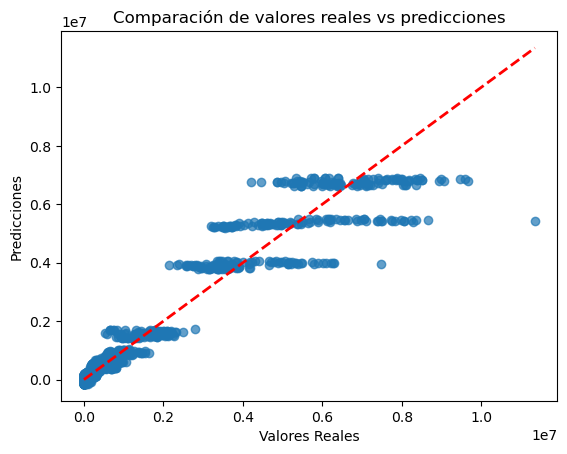

In [53]:
#Se gráfican los datos
plt.scatter(Yinf_test, Yhat, alpha=0.7)
plt.plot([min(Yinf_test), max(Yinf_test)], [min(Yinf_test), max(Yinf_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación de valores reales vs predicciones")
plt.show()

**Conclusiones:**

El modelo de regresión lineal múltiple presenta un R2 cercano a 0.9376, lo que indica que el 93.76% de la variabilidad en la variable dependiente es explicada por las variables independientes incluidas en el modelo. Este valor sugiere que el modelo tiene un buen ajuste a los datos.

Sin embargo, el Error Residual Estándar (RSE) es de aproximadamente 428,944.5742, lo cual sugiere que, en promedio, las predicciones del modelo tienen una desviación significativa respecto a los valores reales. Este valor es relativamente alto, lo que indica que aún existen errores de predicción que el modelo no logra capturar adecuadamente.

El margen de error medio es de aproximadamente 195,793.2682, lo que indica el error promedio que el modelo tiene al predecir. Aunque el modelo tiene un buen R2, el margen de error sugiere que las predicciones individuales pueden variar considerablemente en algunos casos, lo que podría limitar su precisión en aplicaciones específicas donde los errores menores son críticos.

En resumen, aunque el modelo explica la mayor parte de la variabilidad de los datos (con un R2 alto), hay un margen de error considerable que debe ser tomado en cuenta. Sería recomendable investigar si la adición de más variables o el uso de transformaciones en los datos podría reducir este error y mejorar la precisión del modelo. Como se sugirió anteriormente estos valores pueden ser debido a las pocas observaciones de materiales no metálicos en comparación con los metálicos, o debido a las variaciones de los otros materiales.

>**EXTRA**

In [54]:
#Se guarda model de regresión
lineal_model.save("lineal_model.pickle")

#Código para importar
from statsmodels.regression.linear_model import OLSResults
new_results = OLSResults.load("lineal_model.pickle")

**Código de honor:** Doy mi palabra que he realizado esta actividad con integridad académica.